In [10]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

import achiralqw as aqw

from achiralqw.graph import QWGraph, QWGraphBuilder as qwgb
from achiralqw.plotter import *
from achiralqw.trends import *
from achiralqw.collection import CachedQWGraphCollection, CollectionBuilder
from achiralqw.article import plot_size_progression_multi

cb = CollectionBuilder()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
#todo

#copy most of the methods in the article plot?

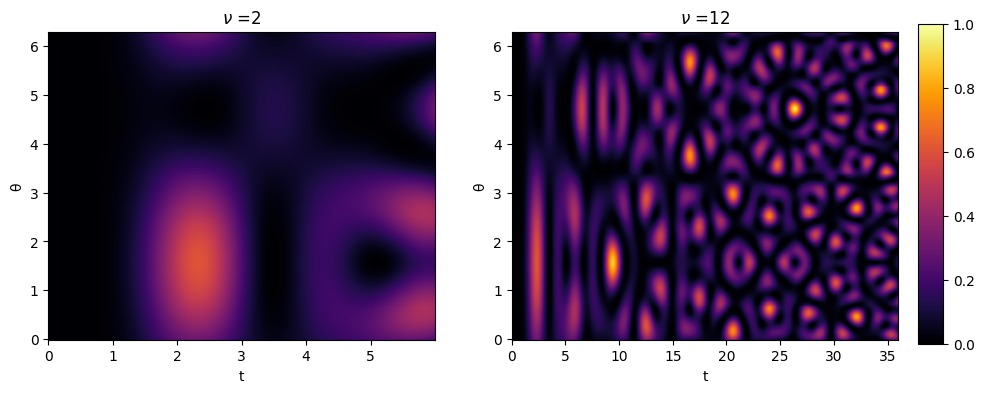

In [6]:
# this method allows to compare how the phase dependend probability landscape changes according to the TIME CONSTANT used for maximum transport time

def comp_evo_vs_phase(gr, TC_vec, **kwargs):

    n = len(TC_vec)

    fig, axx = plt.subplots(1,n, figsize = (5*n,4)) #5*n definitely is not scalable but what did you expect

    for ax, TC in zip(axx,TC_vec) :
        plot_evo_vs_phase(gr, TC = TC, ax = ax, **kwargs )
        ax.set_title("$\\nu$ ={}".format(TC))

    fit_colorbar(fig)
    plt.show()


gr = qwgb.Ring(7)
comp_evo_vs_phase(gr, (2,12), by = .01, phase_by = .02)



C progression: Starting pool creation with 16 process


100%|██████████| 46/46 [00:19<00:00,  2.41it/s]


C8 : Starting pool evaluation with 16 process
Data Setup


46it [00:16,  2.85it/s]


Evaluation


100%|██████████| 46/46 [00:01<00:00, 36.12it/s]


C progression: Starting pool creation with 16 process


100%|██████████| 46/46 [00:20<00:00,  2.20it/s]


h(C4) : Starting pool evaluation with 16 process
Data Setup


46it [00:20,  2.27it/s]


Evaluation


100%|██████████| 46/46 [00:01<00:00, 44.65it/s]


P progression: Starting pool creation with 16 process


100%|██████████| 46/46 [00:14<00:00,  3.08it/s]


P4 : Starting pool evaluation with 16 process
Data Setup


46it [00:17,  2.67it/s]


Evaluation


100%|██████████| 46/46 [00:00<00:00, 292.90it/s]


C progression: Starting pool creation with 16 process


100%|██████████| 46/46 [00:24<00:00,  1.87it/s]


C8 : Starting pool evaluation with 16 process
Data Setup


46it [00:15,  2.95it/s]


Evaluation


100%|██████████| 46/46 [00:05<00:00,  8.31it/s]


C progression: Starting pool creation with 16 process


100%|██████████| 46/46 [00:22<00:00,  2.04it/s]


h(C4) : Starting pool evaluation with 16 process
Data Setup


46it [00:17,  2.63it/s]


Evaluation


100%|██████████| 46/46 [00:06<00:00,  7.01it/s]


P progression: Starting pool creation with 16 process


100%|██████████| 46/46 [00:14<00:00,  3.13it/s]


P4 : Starting pool evaluation with 16 process
Data Setup


46it [00:23,  1.92it/s]


Evaluation


100%|██████████| 46/46 [00:00<00:00, 117.26it/s]


C progression: Starting pool creation with 16 process


100%|██████████| 46/46 [00:19<00:00,  2.41it/s]


C8 : Starting pool evaluation with 16 process
Data Setup


46it [00:19,  2.38it/s]


Evaluation


100%|██████████| 46/46 [00:25<00:00,  1.78it/s]


C progression: Starting pool creation with 16 process


100%|██████████| 46/46 [00:16<00:00,  2.84it/s]


h(C4) : Starting pool evaluation with 16 process
Data Setup


46it [00:15,  3.06it/s]


Evaluation


100%|██████████| 46/46 [00:25<00:00,  1.82it/s]


P progression: Starting pool creation with 16 process


100%|██████████| 46/46 [00:16<00:00,  2.80it/s]


P4 : Starting pool evaluation with 16 process
Data Setup


46it [00:14,  3.14it/s]


Evaluation


100%|██████████| 46/46 [00:00<00:00, 200.19it/s]


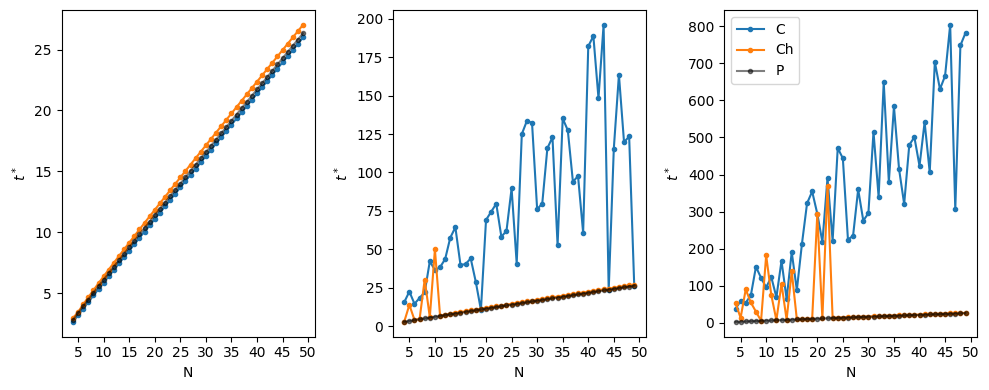

In [11]:
# we can also compare the transport time/probability of a family of graphs as a function of the transport distance and TIME CONSTANT

def comp_size_progression(TC_vec = [1,5,20], **kwargs):

    fig, axx = plt.subplots(1, len(TC_vec), figsize = (10,4))

    for ax , TC in zip(axx, TC_vec):
        set_progression_plot(ax, **kwargs)

        an = Analyzer(mode = "TC", TC = TC)
        plot_size_progression_multi(ax = ax, mode = "TC", TC = TC, analyzer = an, **kwargs)
    
    axx[-1].legend()
    fig.tight_layout()

    plt.show()

comp_size_progression( bounds = (4,50), step = 2, target = "t", x_mode = "size")

In [ ]:
# here we can still visualize a comparison between the transport performance of families of graph, here we compare 3 different kind of chains

def plot_chain_progression_multi( bounds = (3,20), points = 50, target = "p", analyzer = None, fast = False, loglog = False):


    fig, ax = plt.subplots(1,1, figsize = (6,5))
    set_progression_plot(ax, x_mode = "dist", target = target, loglog = True)

    if loglog:
        ax.set_xscale("log")
        ax.set_yscale("log")

        select = np.geomspace(*bounds, num = points, dtype=int)
        select = set(select)
        select = [x for x in select]
        select.sort()
        select = np.array(select)

        bouds = (min(select), max(select))

    else:
         select = None

    print(select)

    if fast:
        if analyzer == None:
            analyzer = Analyzer()
        
        analyzer.set_opt_mode("fix")
        analyzer.set_diag(True)


    if fast:
        analyzer.set_gr(QWGraphBuilder.Ring(3))
        analyzer.set_fix_phi( analyzer.optimum_phase_smart()[0])
    plot_chain_progression( QWGraphBuilder.Ring(3)    , bounds = bounds, select = select, target = target, ax = ax, analyzer = analyzer, label = "C3")

    if fast:
        analyzer.set_gr(QWGraphBuilder.Ring(4))
        analyzer.set_fix_phi( analyzer.optimum_phase_smart()[0])
    plot_chain_progression( QWGraphBuilder.Ring(4)    , bounds = bounds, select = select, target = target, ax = ax, analyzer = analyzer, label = "C4")

    if fast:
        analyzer.set_gr(QWGraphBuilder.SquareCut())
        analyzer.set_fix_phi( analyzer.optimum_phase_smart()[0])
    plot_chain_progression( QWGraphBuilder.SquareCut(), bounds = bounds, select = select, target = target, ax = ax, analyzer = analyzer, label = "DiC4")

    L_x, L_data = get_line_data( (bounds[0]+2, bounds[1]+2), target = target)
    ax.plot(L_x, L_data, label = "P", color = "black", alpha = .5)

    #log scale doesn't like integer ticks (as enforced by standard_progresion)
    ax.legend()
    
    return fig, ax



plot_chain_progression_multi( bounds = (4,50), target = "t", fast = True)

In [ ]:
#highlight the polinomial scaling of the transport performance by plotting it on log log axes

plot_chain_progression_multi( bounds = (4,500), target = "p", fast = True, loglog = True)

In [ ]:
#the same log log plot can be used to highlight the asymtotic constant shift in transport performance between even and odd cycles

def plot_odd_even_progression( bounds = (3,12),target = "p", ax = None, **kwargs) :
    """
    Show differences in behaviour between odd and even C graph
    You can plot either best transport time or probability
    """

    if ax == None:
        fig, ax = plt.subplots(1,1, figsize = (6,5))

    ax.set_xscale("log")
    ax.set_yscale("log")
    set_progression_plot(ax, bounds = bounds,  xmode = "dist", target = target, loglog = True)

    cb = CollectionBuilder()
    prog = cb.C_progression(bounds = bounds, step = 2, odd = False, **kwargs)

    plot_standard_progression(prog, target = target,label = "C even", ax = ax)
    
    prog = cb.C_progression(bounds = bounds, step = 2, odd = True, **kwargs)

    plot_standard_progression(prog, target = target,label = "C odd", ax = ax)

    L_x, L_data = get_line_data( (bounds[0]+1, bounds[1]), target = target)
    ax.plot(L_x, L_data, label = "P", color = "black", alpha = .5)

    return ax

plot_odd_even_progression( bounds = (4,50)).legend()

In [ ]:
#given a list of graphs and a list of TIME COSTANT we can compare how the phase dependent transport performance bhaves

def plot_performance_1_multi(gr,TC_vec, first = False, step = 100, ax = None):
    """
    Ad hoc plot performance wrapper for multiple  TC
    """
    if ax == None :
        fig, ax = plt.subplots(1,1, figsize = (6,5))

    if first:
        plot_performance(gr, an_mode = "first", sample_step = step, ax = ax)

    for TC in TC_vec:
        plot_performance(gr, an_mode= "TC", TC = TC, sample_step = step, \
                         ax = ax)

    return ax 


def comp_performance_multi( gr_list, **kwargs):

    fig, axx = plt.subplots(1, len(gr_list), figsize = (11,4))

    for ax , gr in zip(axx, gr_list):
        print("Performance_multi for {}".format(gr.code))
        plot_performance_1_multi(gr,ax = ax, **kwargs)
        ax.legend()

    plt.show()

grlist = [qwgb.Ring(6, HANDLES = True), qwgb.Ring(7)]
tclist = [5,20]

comp_performance_multi(grlist, TC_vec = tclist, first = True, step = 2000)

In [ ]:
# just as before we can highlight the differnce in phase response between the odd and even size graph

def plot_performance_odd_even( step = 100):
    """
    Example plot of transport probability for ODD vs EVEN C graphs
    """

    fig, axx = plt.subplots(1,2, figsize = (10,4))
    set_performance_plot(axx[0], target = "p")
    set_performance_plot(axx[1], target = "p")

    gr_list_odd = []

    gr_list_odd.append( QWGraphBuilder.Ring(5, HANDLES = True))
    gr_list_odd.append( QWGraphBuilder.Ring(7))
    gr_list_odd.append( QWGraphBuilder.Ring(9, HANDLES = True))
    gr_list_odd.append( QWGraphBuilder.Ring(11))

    gr_list_even = []

    gr_list_even.append( QWGraphBuilder.Ring(4))
    gr_list_even.append( QWGraphBuilder.Ring(6, HANDLES = True))
    gr_list_even.append( QWGraphBuilder.Ring(8))
    gr_list_even.append( QWGraphBuilder.Ring(10, HANDLES = True))

    for gr_o, gr_e in zip(gr_list_odd, gr_list_even):
        plot_performance(gr_o, sample_step = step , an_mode="first", ax = axx[0])
        plot_performance(gr_e, sample_step = step , an_mode="first", ax = axx[1])

    axx[0].legend()
    axx[1].legend()
    plt.show()
    
plot_performance_odd_even(step = 1000)

In [ ]:
#and observe how the odd/even phase optimality can be still observed when the single units are combined

def example_multi_2_phases( sample = 100):
    """
    Example plot with 2phase performance comparison between first maxima and TC10 search for a sample of graphs
    """

    gr_num = 3
    gr_list = []

    gr_list.append( QWGraphBuilder.Ring(9)| QWGraphBuilder.Ring(4))
    gr_list.append( QWGraphBuilder.Ring(8)+ QWGraphBuilder.Ring(8))
    gr_list.append( QWGraphBuilder.SquareCut())

    fig, axx = plt.subplots(2,gr_num, figsize = (9,6))

    for i in range(len(gr_list)):
        plot_performance( gr_list[i],sample_step=sample, an_mode = "first", ax = axx[0][i], verbose = True)
        plot_performance( gr_list[i],sample_step=sample, an_mode = "TC", TC = 10, ax = axx[1][i],  verbose = True)


    # add single colorbar trick
    # https://stackoverflow.com/questions/13784201/how-to-have-one-colorbar-for-all-subplots
    #fig.tight_layout()
    fit_colorbar(fig)

    fig.savefig("ex_2ph.png")

    plt.show()
    
example_multi_2_phases( sample = 200)

In [ ]:
#a more advanced performance plot can be obtained by plotting togheter the time and probability transport performance
# in chains the information on time of arrival is not a trivial function of the applied phase

def example_chain_time_performance(gr_unit, len = 10, **kwargs):

    fig, ax = plt.subplots(1,1, figsize = (6,5))
    set_performance_plot(ax, target = "p")

    gr = gr_unit.chain(len)

    plot_performance(gr, mode = "time",ax = ax, an_mode = "TC", TC = 2, **kwargs)
    ax.legend()
    plt.show()


unit = qwgb.Ring(3)
example_chain_time_performance(unit, sample_step = 1000)

In [ ]:
# By plotting the speedup dependent transport performance of path graphs we can infer why the C4 chain has such a good transport performance

def line_speedup_perf_comp( bounds = (4,20),step = 3, su_bounds = (.1,2, 1000), target = "p", ax = None , **kwargs):
    """
    Best transport performance of a sample L(N) graphs as a function of speedup
    **kwargs are passed to the analyzer
    """
    
    sample = np.linspace(*su_bounds)
    y_sample = np.arange(start = bounds[0], stop = bounds[1]+1, step = step)
    print(y_sample)
    data = np.empty( ( len(y_sample), len(sample)))
    labels = []

    cur = QWGraphBuilder.Line(4)
    an = Analyzer(cur, mode = "first", **kwargs)

    for m in tqdm(range( len(y_sample))):
        for i in range(len(sample)):
            cur = QWGraphBuilder.Line(y_sample[m], speedup = sample[i], COMPUTE_EIGEN = True)
            an.set_gr(cur)

            data[m,i] = an.locate_max()[1] if target == "p" else an.locate_max()[0]
        labels.append(an.get_label( mode = False))

    if ax == None :
        fig, ax = plt.subplots()

        ax.set_ylim(0,1)

    for i in range( len(y_sample)):
        ax.plot(sample, data[i], label = labels[i])

    ax.vlines(np.sqrt(2), 0,1,linestyle='dashed', color = "red")
    
    ax.set_xlabel('$\mu$')
    ax.set_ylabel('$P_{max}$')

    #Pass parameter for further additions
    return ax


line_speedup_perf_comp( bounds = (6, 56), step = 5, su_bounds = (.1, 2.5, 1000)).legend()